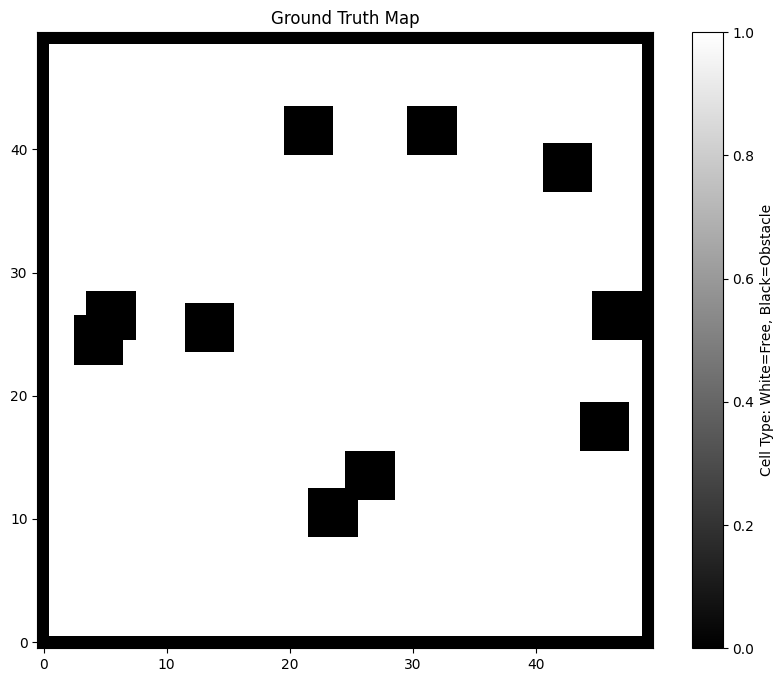


Step 1/5


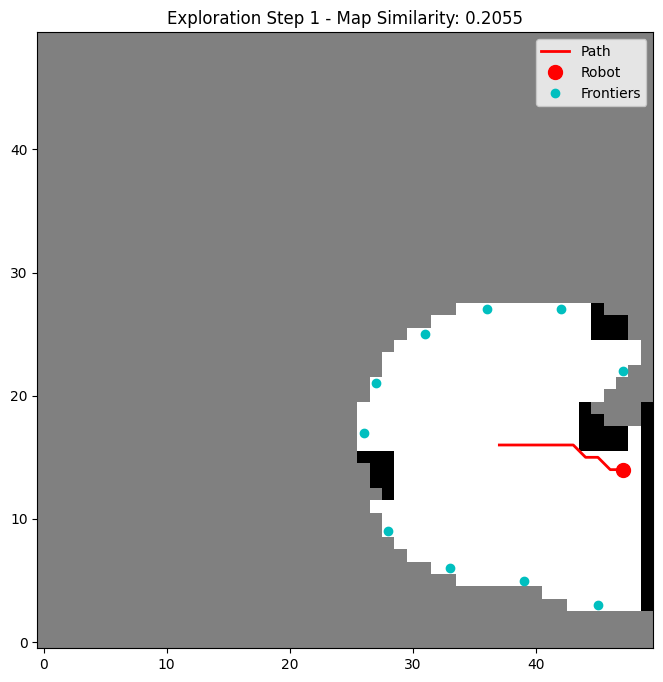

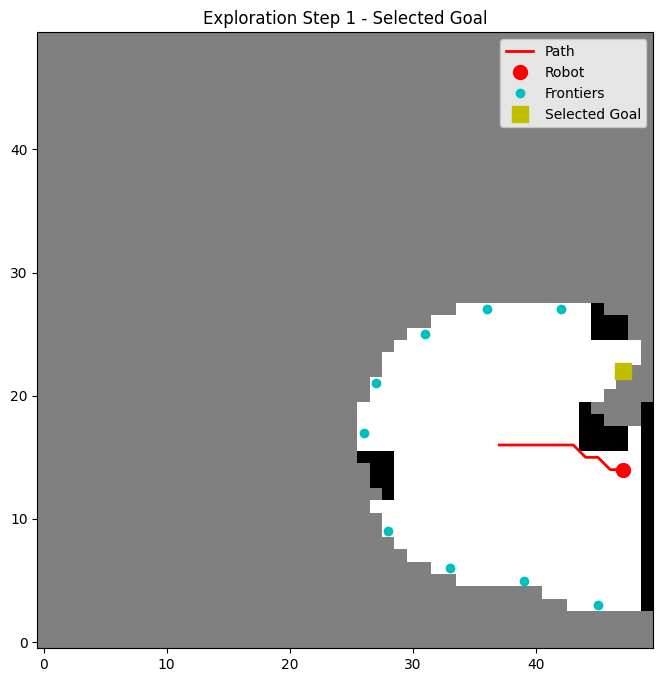

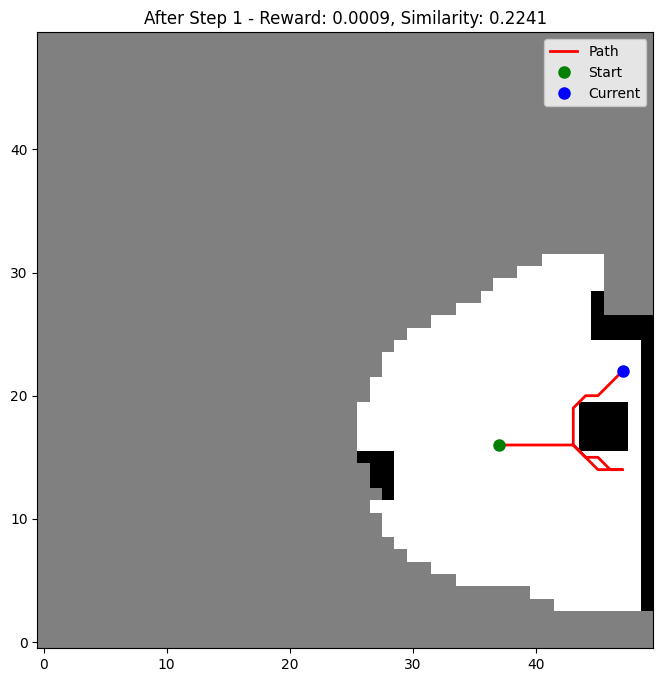

Step 1 complete - Reward: 0.0009, Map Similarity: 0.2241
Information gain: 0.0814, Path cost: 0.0402

Step 2/5


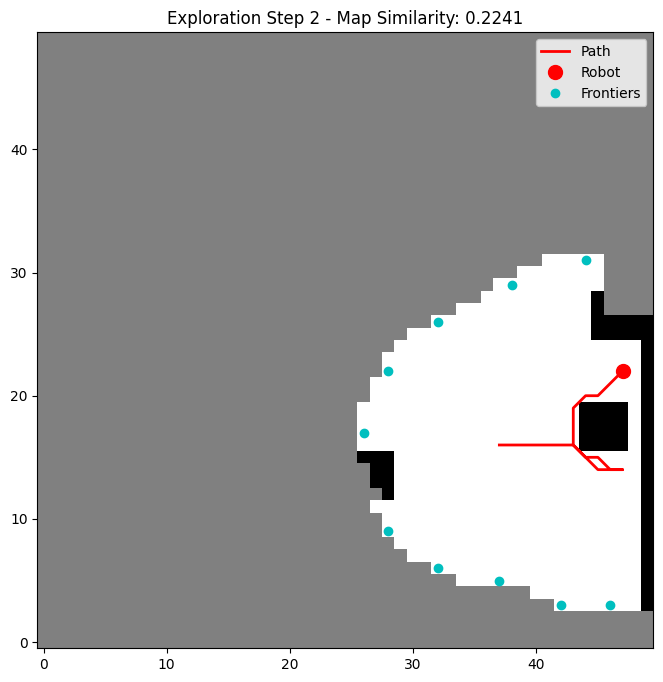

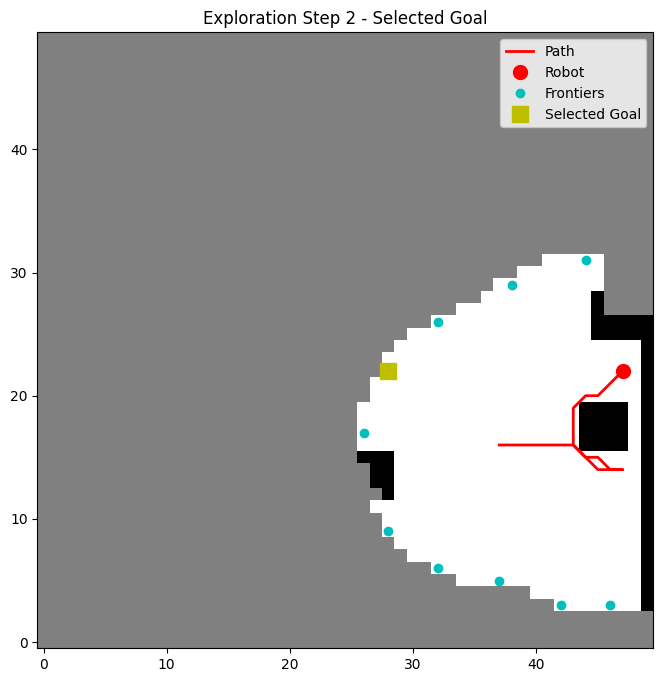

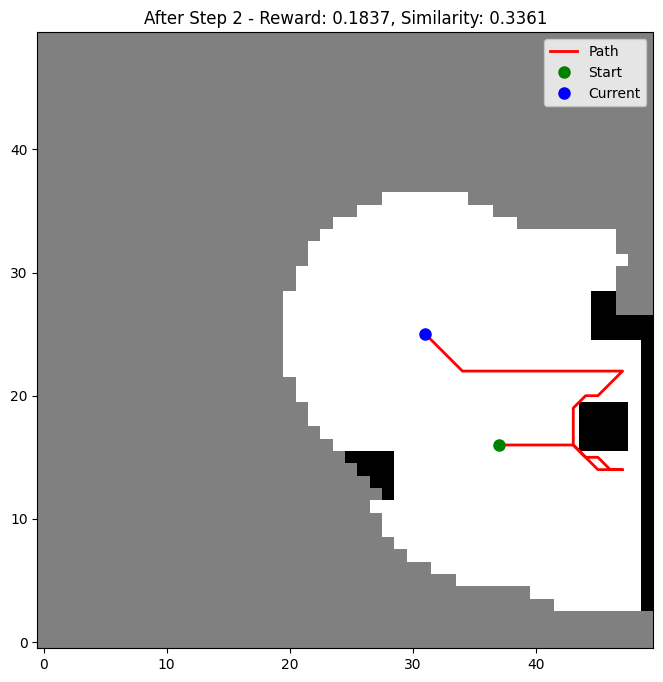

Step 2 complete - Reward: 0.1837, Map Similarity: 0.3361
Information gain: 0.3624, Path cost: 0.0894

Step 3/5


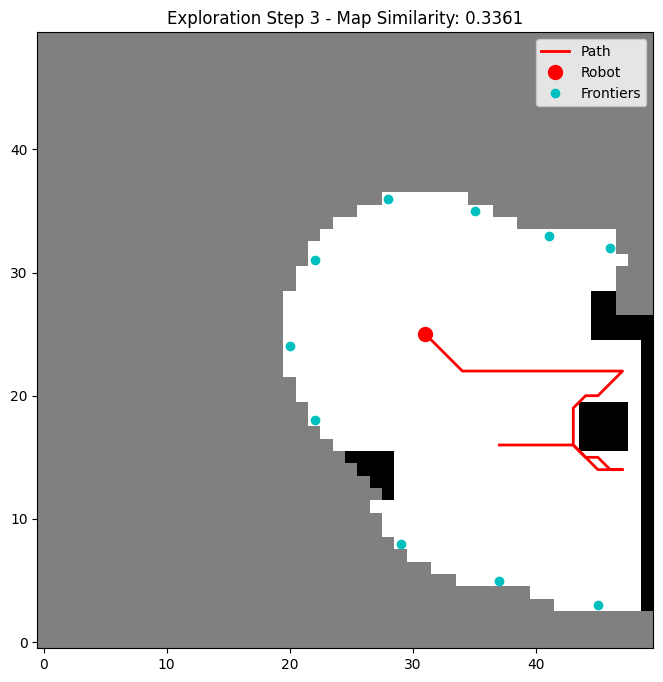

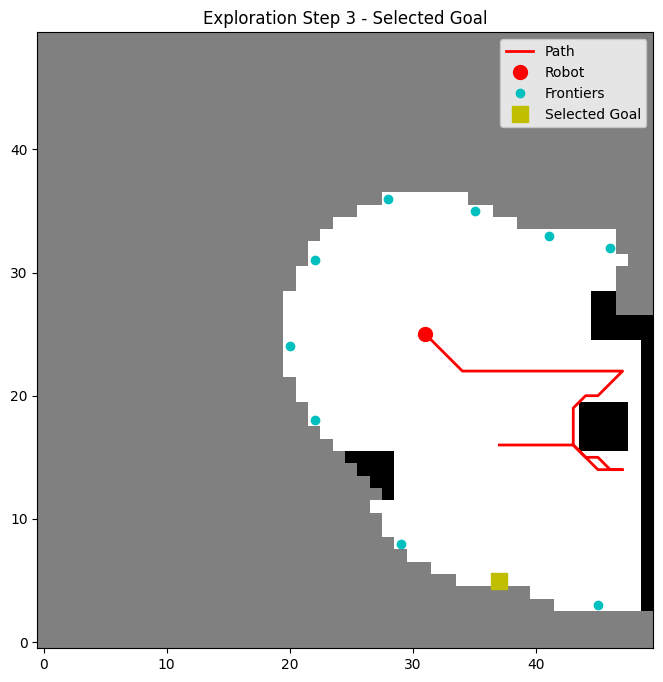

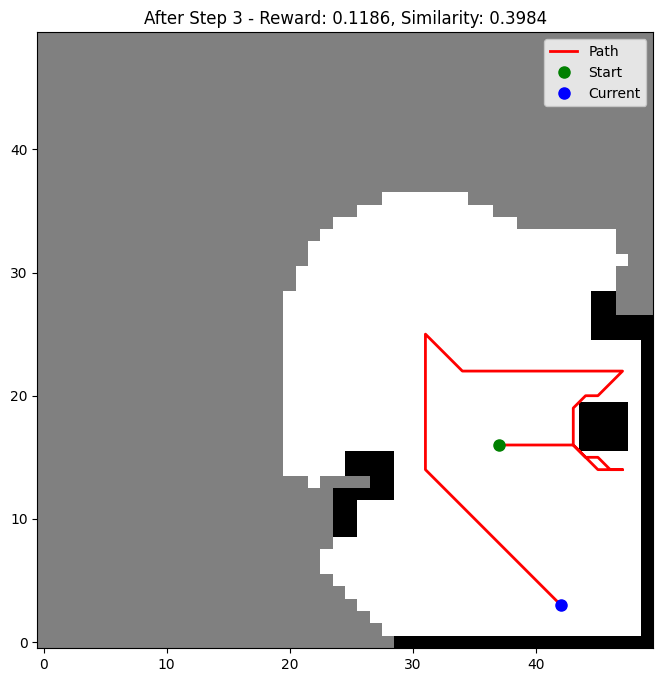

Step 3 complete - Reward: 0.1186, Map Similarity: 0.3984
Information gain: 0.2485, Path cost: 0.0650

Step 4/5


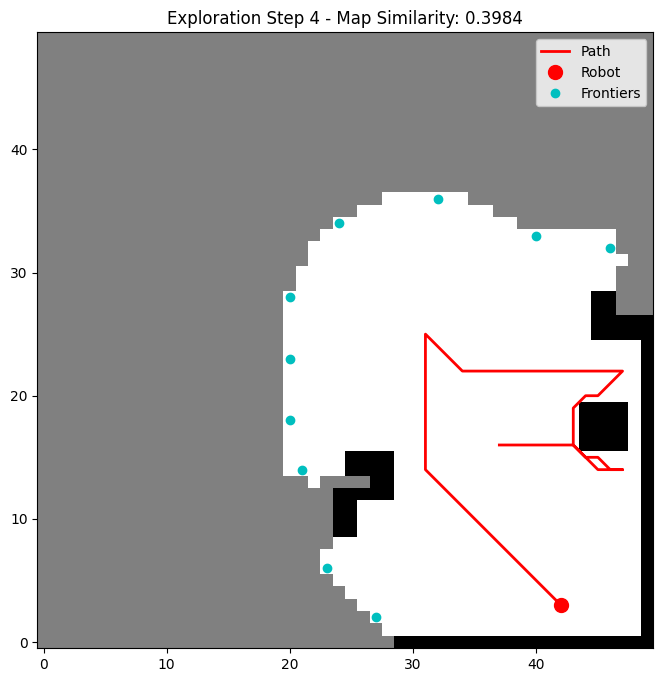

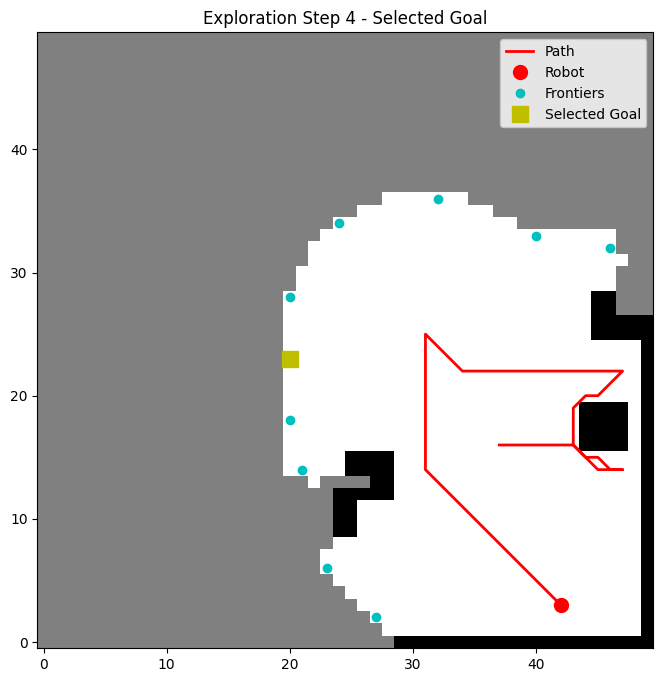

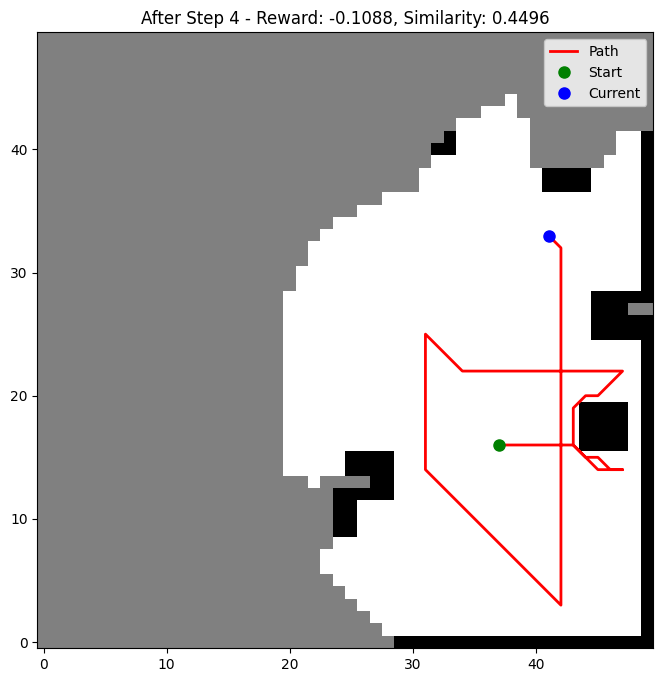

Step 4 complete - Reward: -0.1088, Map Similarity: 0.4496
Information gain: 0.2041, Path cost: 0.1565

Step 5/5


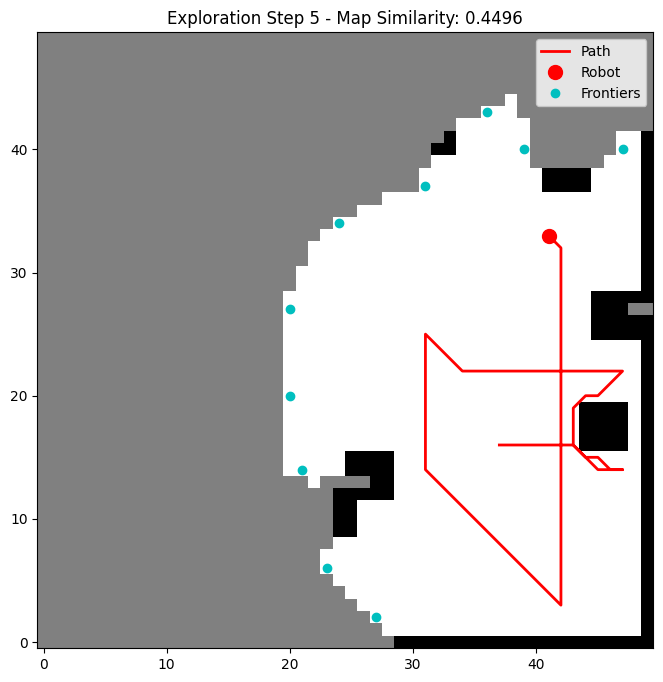

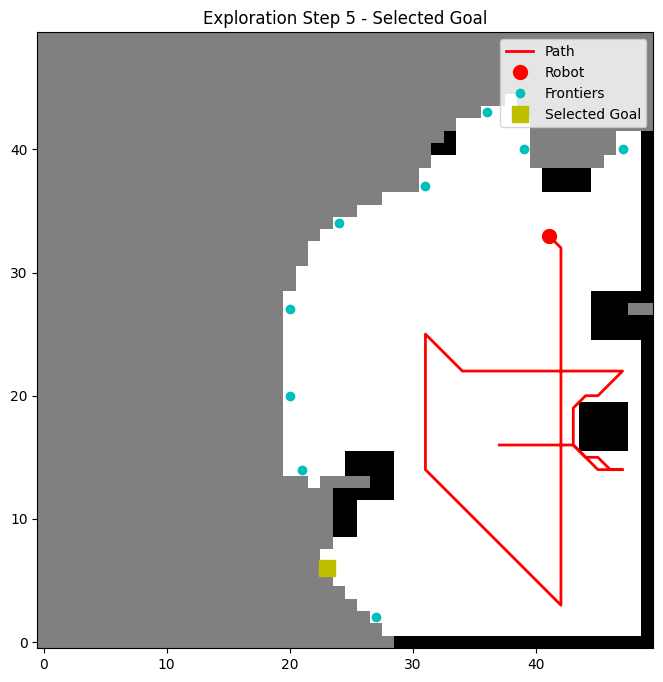

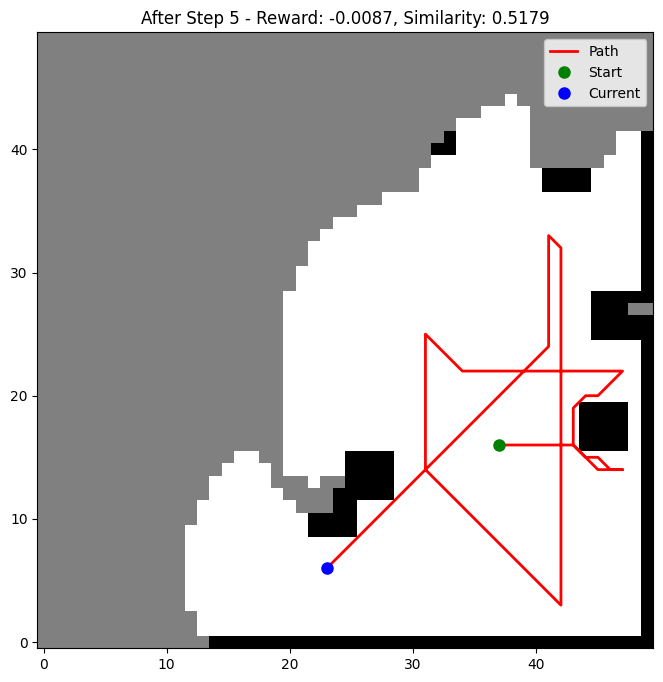

Step 5 complete - Reward: -0.0087, Map Similarity: 0.5179
Information gain: 0.2485, Path cost: 0.1286


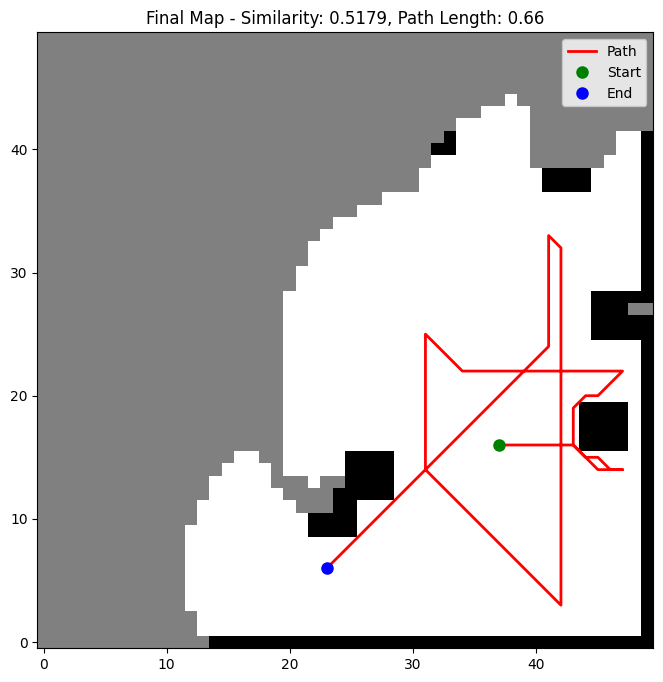

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from environments import ExplorationEnv
from environments.map_generator import Map_Generator
from environments.utils.frontier_utils import frontier_space


def test_environment(seed=42, num_steps=15, action_setting=1, delay=1.0):
    np.random.seed(seed)
    map_generator = Map_Generator(seed=seed)
    map_matrix = map_generator.ref_map()
    
    plt.figure(figsize=(10, 8))
    plt.imshow(np.subtract(1, map_matrix), cmap='gray', vmin=0, vmax=1, origin='lower')
    plt.title("Ground Truth Map")
    plt.colorbar(label='Cell Type: White=Free, Black=Obstacle')
    plt.savefig("test_groundtruth_map.png")
    plt.show()
    
    
    env = ExplorationEnv(
        map_matrix=map_matrix,
        action_setting=action_setting,
        pher_condition=False
    )
    
    # Reset environment
    state = env.reset()
    
    _, _, done, info = env.step(0)  
    x = info['robot_position']
    m = info['map']
    localx = info['path_x']
    localy = info['path_y']
    
    # Run steps with visualization
    for step in range(num_steps):
        if done:
            print("Exploration complete!")
            break
            
        print(f"\nStep {step+1}/{num_steps}")
        
        # Detect frontiers
        x_frontiers, y_frontiers = frontier_space(m, env.num_of_clusters, x[0])
        
        # map 
        plt.figure(figsize=(10, 8))
        plt.imshow(np.subtract(1, m), cmap='gray', vmin=0, vmax=1, origin='lower')
        
        # Taken Path
        if len(localx) > 0:
            plt.plot(localx, localy, 'r-', linewidth=2, label='Path')
        
        # Robot Postion
        plt.plot(x[0][1], x[0][0], 'ro', markersize=10, label='Robot')
        
        # Frontiers
        if len(x_frontiers) > 0:
            plt.plot(x_frontiers, y_frontiers, 'co', markersize=6, label='Frontiers')
        
        plt.title(f"Exploration Step {step+1} - Map Similarity: {info['map_similarity']:.4f}")
        plt.legend()
        plt.show()
        
        # Random action for the purpose of validation! 
        action = np.random.randint(0, env.action_dim)
        
        # Just for purpose of Illustration! For the validation test, I assumed the action setting is 1
        # Nearest frontier selection
        distances = np.sqrt((x[0][0] - y_frontiers)**2 + (x[0][1] - x_frontiers)**2)
        sorted_indices = np.argsort(distances)
        goal_idx = sorted_indices[action % len(sorted_indices)]
        goal = [int(y_frontiers[goal_idx]), int(x_frontiers[goal_idx])]
            
        plt.figure(figsize=(10, 8))
        plt.imshow(np.subtract(1, m), cmap='gray', vmin=0, vmax=1, origin='lower')
        

        if len(localx) > 0:
            plt.plot(localx, localy, 'r-', linewidth=2, label='Path')
        plt.plot(x[0][1], x[0][0], 'ro', markersize=10, label='Robot')
        if len(x_frontiers) > 0:
            plt.plot(x_frontiers, y_frontiers, 'co', markersize=6, label='Frontiers')
        if goal is not None:
            plt.plot(goal[1], goal[0], 'ys', markersize=12, label='Selected Goal')
            
        plt.title(f"Exploration Step {step+1} - Selected Goal")
        plt.legend()
        plt.show()
        
        # Sim Env Call
        next_state, reward, done, info = env.step(action)
        
        # Update state variables
        x = info['robot_position']
        m = info['map']
        localx = info['path_x']
        localy = info['path_y']
        
        plt.figure(figsize=(10, 8))
        plt.imshow(np.subtract(1, m), cmap='gray', vmin=0, vmax=1, origin='lower')
        
        if len(localx) > 0:
            plt.plot(localx, localy, 'r-', linewidth=2, label='Path')
            plt.plot(localx[0], localy[0], 'go', markersize=8, label='Start')
            plt.plot(localx[-1], localy[-1], 'bo', markersize=8, label='Current')
        
        plt.title(f"After Step {step+1} - Reward: {reward:.4f}, Similarity: {info['map_similarity']:.4f}")
        plt.legend()
        plt.show()
        
        # Info Validation --> Just to make sure that numbers are whithin acceptable ranges!
        print(f"Step {step+1} complete - Reward: {reward:.4f}, Map Similarity: {info['map_similarity']:.4f}")
        print(f"Information gain: {info['information_gain']:.4f}, Path cost: {info['path_cost']:.4f}")
    
    # Show final state
    final_reward, final_info = env.compute_final_reward()
    
    plt.figure(figsize=(10, 8))
    plt.imshow(np.subtract(1, m), cmap='gray', vmin=0, vmax=1, origin='lower')
    
    # Plot final path
    if len(localx) > 0:
        plt.plot(localx, localy, 'r-', linewidth=2, label='Path')
        plt.plot(localx[0], localy[0], 'go', markersize=8, label='Start')
        plt.plot(localx[-1], localy[-1], 'bo', markersize=8, label='End')
    
    plt.title(f"Final Map - Similarity: {info['map_similarity']:.4f}, Path Length: {final_info['total_path_length']:.2f}")
    plt.legend()
    plt.show()



if __name__ == "__main__":
    test_environment(seed=42, num_steps=5, action_setting=1, delay=0.5)